# Project 1: Solutions

## Problem Statement

Determine the association of factors that influence admission into graduate school using data from the UCLA admissions data set

### Exploratory Analysis Plan

### Dataset review

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns

df = pd.read_csv("./assets/admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


Using the lab from class as a guide, create an exploratory analysis plan. 

#### Data dictionary 

Variable | Column name | Type of Variable | Range | Description | Data type |
---| ---| ---| 
Admit | admit | categorical | 0<br/>1 | not admitted<br />admitted | int64 |
GRE | gre | continuous | 200 - 800 | *GRE*<sup>®</sup> General Test Score | float64 |
GPA | gpa | continuous | 0 - 4 | Grade Point Average | float64 |
Prestige | prestige | categorical | 1<br />2<br />3<br />4 | not prestigious<br />low prestige<br />good prestige<br />high prestige | float64




#### 1. What are the goals of the exploratory analysis? 

Answer: 
1. Determine if there is any missing data
2. Examine the distributions of the variables to determine if any of the variables need be transformed

**Exclude incomplete data records.**

In [4]:
df = df.dropna()

**Verify data distribution**

In [5]:
df[(df.admit != 1) & (df.admit != 0)].size

0

In [6]:
df[(df.gre < 200) & (df.gre > 800)].size

0

In [7]:
df[(df.gpa < 0) & (df.gpa > 4)].size

0

In [8]:
df[(df.prestige < 1) & (df.prestige > 4)].size

0

Answer: All data within ranges

In [9]:
groups = df.groupby('admit')

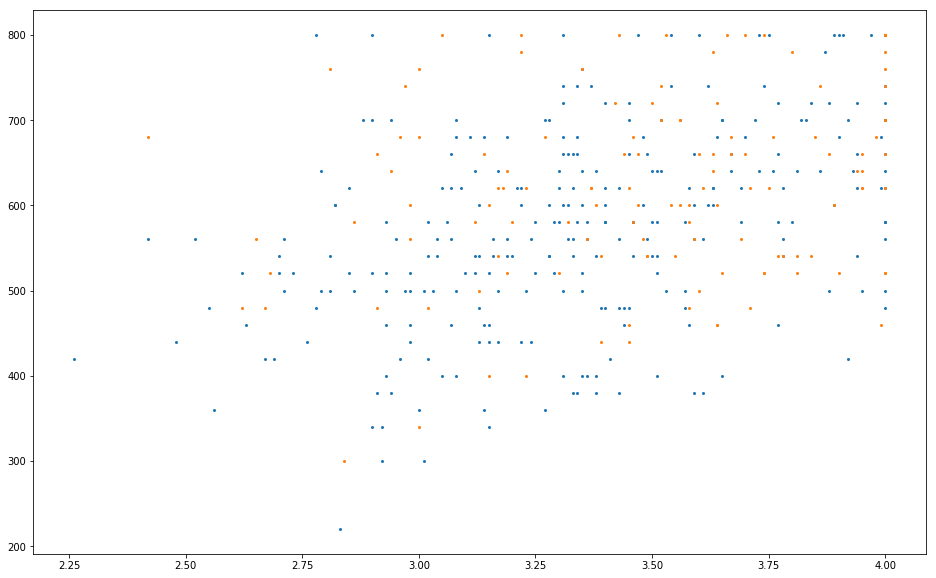

In [10]:
fig, ax = plt.subplots(figsize=(16,10))
for admited, group in groups:
    ax.plot(group.gpa, group.gre, marker='o', linestyle='', ms=2, label=admited)


In [11]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Insights into GPA distribution and variance

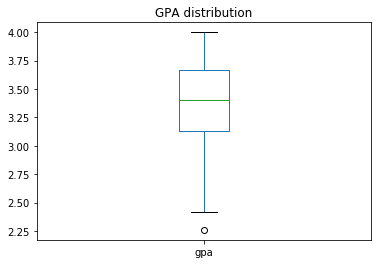

In [12]:
df['gpa'].plot(kind = 'box', title='GPA distribution')

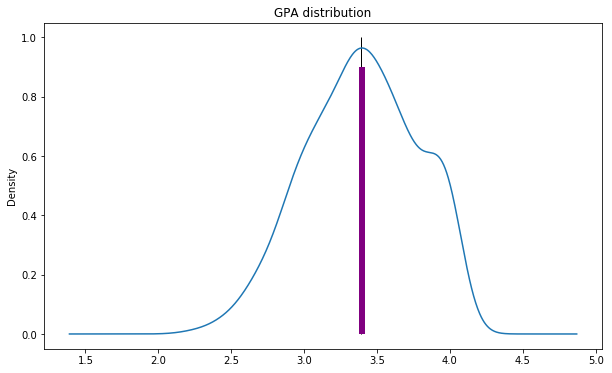

In [13]:
df['gpa'].plot(kind="density",title="GPA distribution",figsize=(10,6))
plt.vlines(df['gpa'].mean(), ymin=0, ymax=1, linewidth=1.0)
plt.vlines(df['gpa'].median(), ymin=0, ymax=.9, linewidth=6.0, color="purple")

In [14]:
print('GPA asymmetry of a distribution: ', df['gpa'].skew())
print('GPA peakedness" of a distribution: ', df['gpa'].kurt())

GPA asymmetry of a distribution:  -0.21688893296924305
GPA peakedness" of a distribution:  -0.5635698995221681


#### Insights into GRE distribution and variance

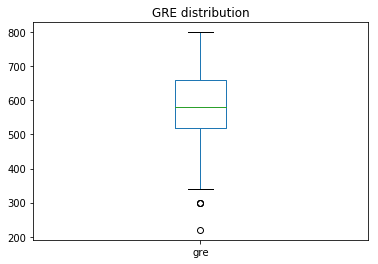

In [15]:
df['gre'].plot(kind = 'box', title='GRE distribution')

In [16]:
df['gre'].plot(kind="density",title="GRE distribution",figsize=(10,6))
plt.vlines(df['gre'].mean(), ymin=0, ymax=0.0035, linewidth=1.0)
plt.vlines(df['gre'].median(), ymin=0, ymax=.003, linewidth=6.0, color="purple")b

SyntaxError: invalid syntax (<ipython-input-16-861c457b233c>, line 3)

In [17]:
print('GRE asymmetry of a distribution: ', df['gre'].skew())
print('GRE peakedness" of a distribution: ', df['gre'].kurt())

GRE asymmetry of a distribution:  -0.146046988215597
GRE peakedness" of a distribution:  -0.33286435465143427


Variance of GRE distribution is higher then GPA,

### Is prestige of under graduate school impacting UCLA addmission?

In [18]:
df[(df.prestige == 4)].size

268

In [19]:
prestiges = df[['prestige','admit']]
prestiges_group = prestiges.groupby(['prestige', 'admit']).size().reset_index(name='counts')
prestiges_group

,prestige,admit,counts
0,1.0,0,28
1,1.0,1,33
2,2.0,0,95
3,2.0,1,53
4,3.0,0,93
5,3.0,1,28
6,4.0,0,55
7,4.0,1,12


In [20]:
prestige_counts = prestiges_group.pivot(index='prestige', columns='admit')
admit_sums = prestige_counts['counts'].sum()
#prestige_counts['admit_sum'] = prestige_counts['counts'] / admit_sums[0]
prestiges_group['relative'] = prestiges_group['counts'] / admit_sums[0]
prestiges_group.head()
#admit_sums

,prestige,admit,counts,relative
0,1.0,0,28,0.103321
1,1.0,1,33,0.121771
2,2.0,0,95,0.350554
3,2.0,1,53,0.195572
4,3.0,0,93,0.343173


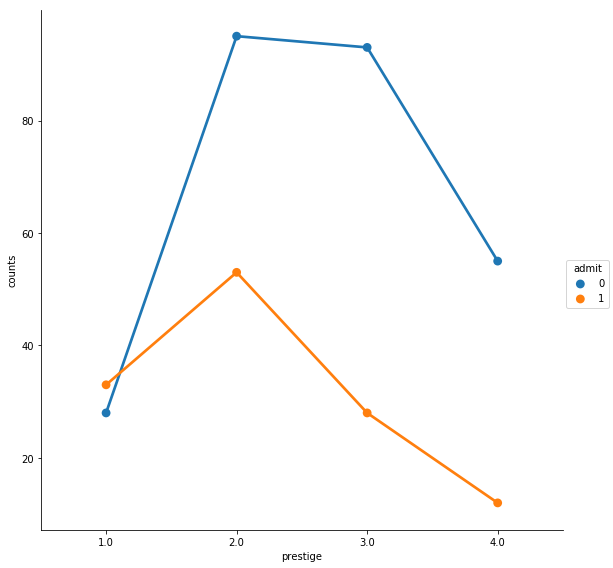

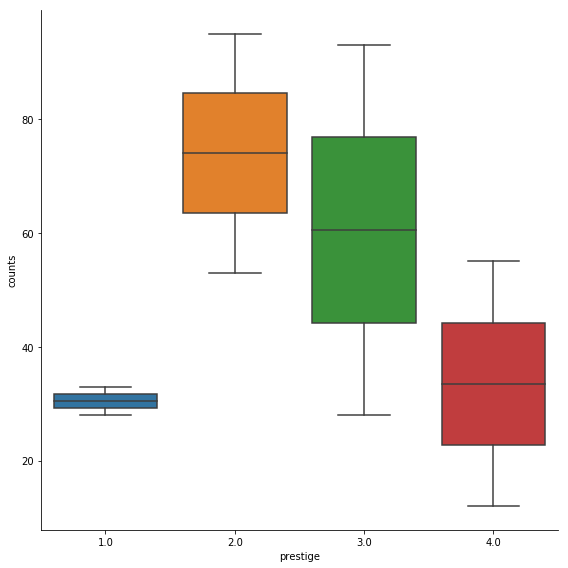

In [21]:
plt.figure()
sns.factorplot("prestige", "counts",  data = prestiges_group, split=True, hue="admit", size=8)
sns.factorplot("prestige", "counts", data = prestiges_group, kind="box", size=8)

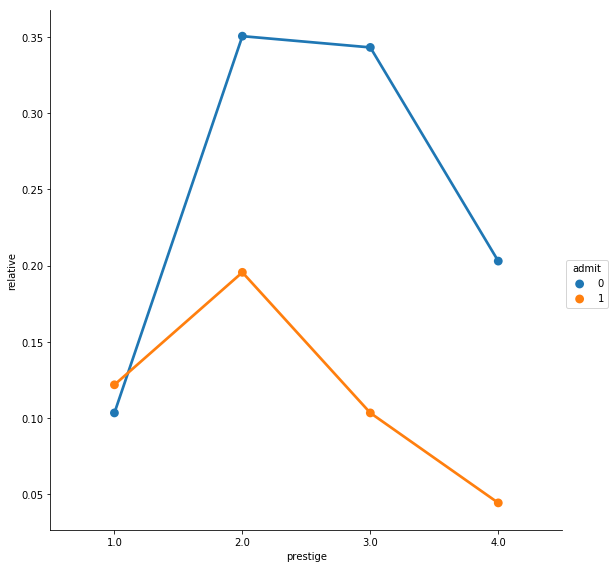

In [22]:
sns.factorplot("prestige", "relative", data = prestiges_group, size=8, split=True, hue="admit")